In [101]:
import pandas as pd 
df_original = pd.read_csv("data/titanic/train.csv", sep=',')
df = pd.read_csv("data/titanic/train.csv", sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
df.shape

(891, 12)

In [103]:
dfTest = pd.read_csv("data/titanic/test.csv", sep=',')
dfTest.head()
dfTest.shape

(418, 11)

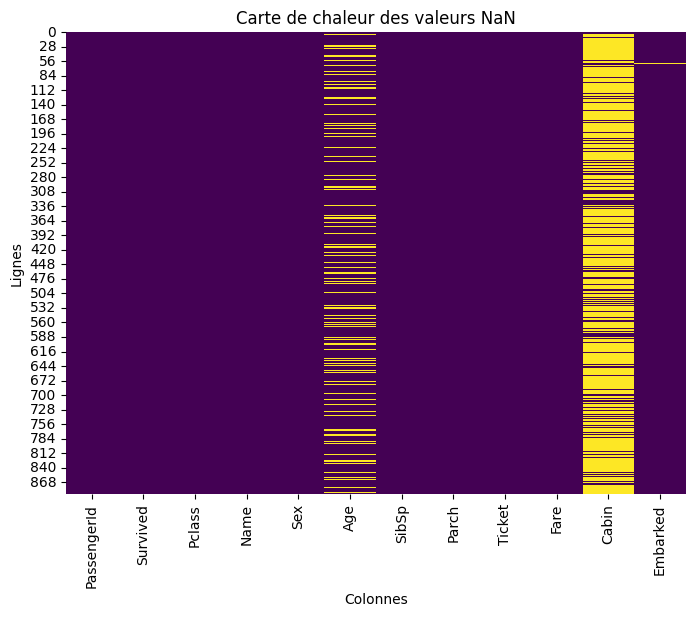

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Carte de chaleur des valeurs NaN')
plt.xlabel('Colonnes')
plt.ylabel('Lignes')
plt.savefig("./images/heatmap.png")
plt.show()

In [105]:
#print the age % of NaN values
percentage_nan = df['Age'].isnull().mean() * 100
print(f"Le pourcentage de valeurs NaN dans la colonne 'age' est de {percentage_nan:.2f}%")

Le pourcentage de valeurs NaN dans la colonne 'age' est de 19.87%


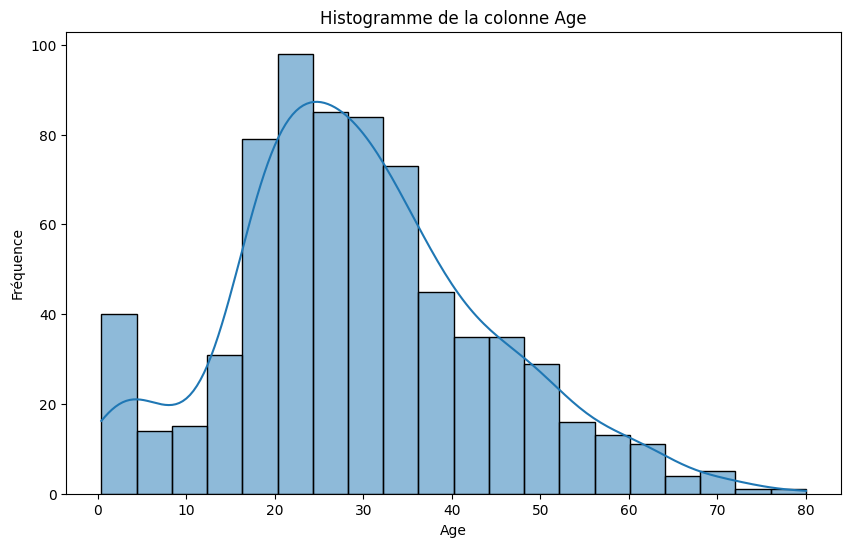

In [106]:
#print the histogram of the age column
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Histogramme de la colonne Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
# Sauvegarde du graphique (optionnel)
plt.savefig('./images/age_histogram.png')
plt.show()

In [107]:
#print the median and the mean of the age column
print(f"La médiane de la colonne Age est : {df['Age'].mean():.1f}")
print(f"La moyenne de la colonne Age est : {df['Age'].median():.1f}")

La médiane de la colonne Age est : 29.7
La moyenne de la colonne Age est : 28.0


In [108]:
percentage_nan_cabin = df['Cabin'].isnull().mean() * 100
print(f"Le pourcentage de valeurs NaN dans la colonne 'Cabin' est de {percentage_nan_cabin:.2f}%")

Le pourcentage de valeurs NaN dans la colonne 'Cabin' est de 77.10%


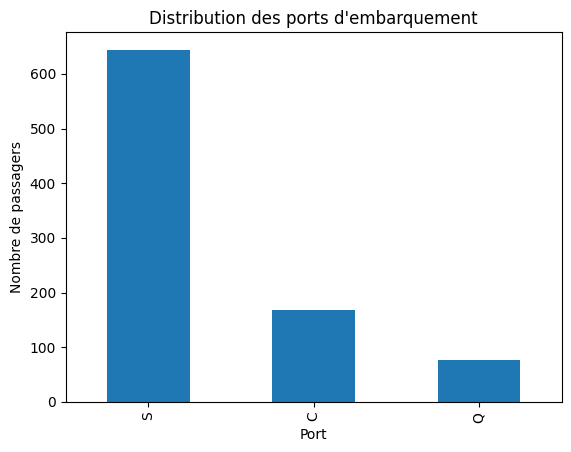

In [109]:
df['Embarked'].value_counts().plot(kind='bar')
plt.title('Distribution des ports d\'embarquement')
plt.xlabel('Port')
plt.ylabel('Nombre de passagers')
plt.savefig("./images/portsEmbarquements.png")
plt.show()

In [110]:
# We will make the following changes to the data:

# If "Age" is missing for a given row, we assign 28 (median age).
# If "Embarked" is missing for a given line, we assign "S" (most common embarked).
# We will ignore "Cabin" as a variable. There are too many missing values ​​it wouldn't make sense to assign values ​​to it.
#apply the preprocessing like above
#verify your results

df['Age'].fillna(28, inplace=True)
df['Embarked'].fillna('S', inplace=True)
# df.drop(columns=['Cabin'], inplace=True)
missing_values = df.isnull().sum()
print("Valeurs manquantes après prétraitement :")
print(missing_values)

print("\nAperçu du DataFrame après prétraitement :")
print(df.head())

print("\nDistribution de 'Embarked' :")
print(df['Embarked'].value_counts())

print("\nStatistiques de 'Age' :")
print(df['Age'].describe())

Valeurs manquantes après prétraitement :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Aperçu du DataFrame après prétraitement :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0

C:\Users\Gaetan\AppData\Local\Temp\ipykernel_12036\2452356430.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(28, inplace=True)
C:\Users\Gaetan\AppData\Local\Temp\ipykernel_12036\2452356430.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

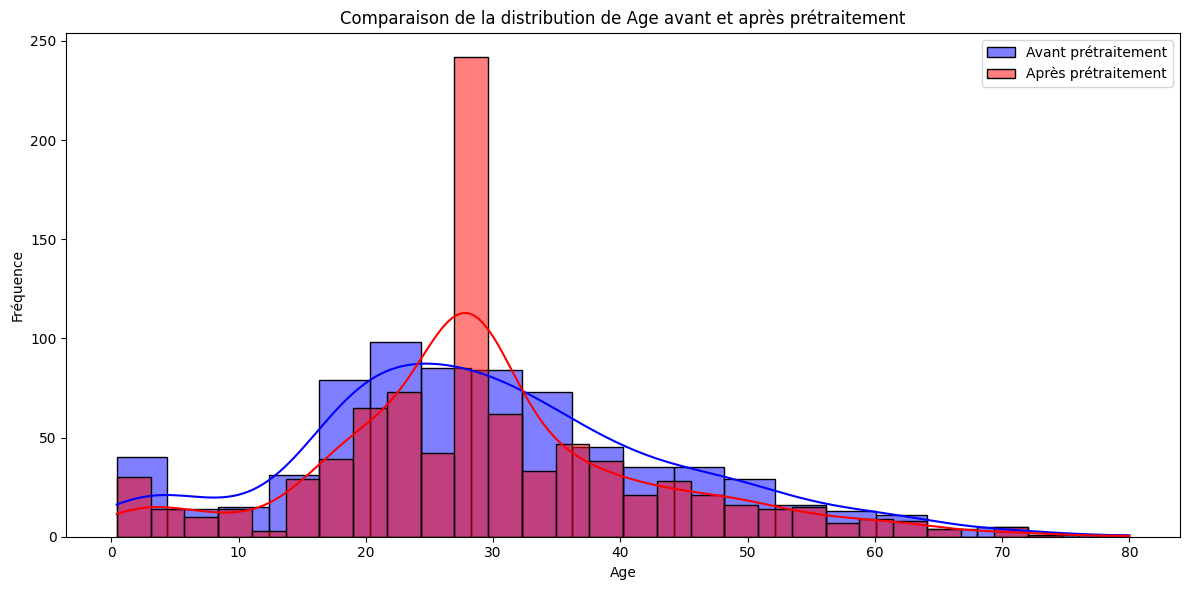

In [111]:
# Créer une seule figure
plt.figure(figsize=(12, 6))

# Tracer les deux histogrammes sur le même graphique
sns.histplot(data=df_original, x='Age', kde=True, color='blue', alpha=0.5, label='Avant prétraitement')
sns.histplot(data=df, x='Age', kde=True, color='red', alpha=0.5, label='Après prétraitement')

# Ajouter les détails du graphique
plt.title('Comparaison de la distribution de Age avant et après prétraitement')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.legend()

# Ajuster l'espacement
plt.tight_layout()

# Sauvegarder la figure
plt.savefig("./images/avant_et_apres_combine.png")

# Afficher la figure
plt.show()

In [112]:
df['TravelAlone'] = ((df['SibSp'] == 0) & (df['Parch'] == 0)).astype(int)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  TravelAlone  
0      0         A/5 21171   7.2500   NaN        S            0  
1      0          PC 17599  71.2833   C85        C            0  
2      0  STON/O2. 3101282   7.9250   NaN        S            1  
3      0            113803  53.1000  C123        S      

In [113]:
encoded_df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
print(encoded_df.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin  TravelAlone  Pclass_2  \
0  22.0      1      0         A/5 21171   7.2500   NaN            0     False   
1  38.0      1      0          PC 17599  71.2833   C85            0     False   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN            1     False   
3  35.0      1      0            113803  53.1000  C123            0     False   
4  35.0      0      0            373450   8.0500   NaN            1     False   

   Pclass_3  Sex_male  Embarked_Q  Emb

In [114]:
# df['Sex_male'] = (df['Sex'] == 'male').astype(int)
# columns_to_keep = ['Survived', 'Age', 'Fare', 'TravelAlone', 'Sex_male']
# df = df[columns_to_keep]
# print(df.head())

In [115]:
# Remplir les valeurs manquantes dans la colonne 'Age'
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

# Remplir les valeurs manquantes dans la colonne 'Fare'
if 'Fare' in df.columns:
    if 'Pclass' in df.columns:
        df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'), inplace=True)
    else:
        df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Créer une nouvelle colonne 'Cabin_known'
if 'Cabin' in df.columns:
    df['Cabin_known'] = df['Cabin'].notna().astype(int)

# Afficher les valeurs manquantes
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
TravelAlone      0
Cabin_known      0
dtype: int64


C:\Users\Gaetan\AppData\Local\Temp\ipykernel_12036\2521975573.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Gaetan\AppData\Local\Temp\ipykernel_12036\2521975573.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

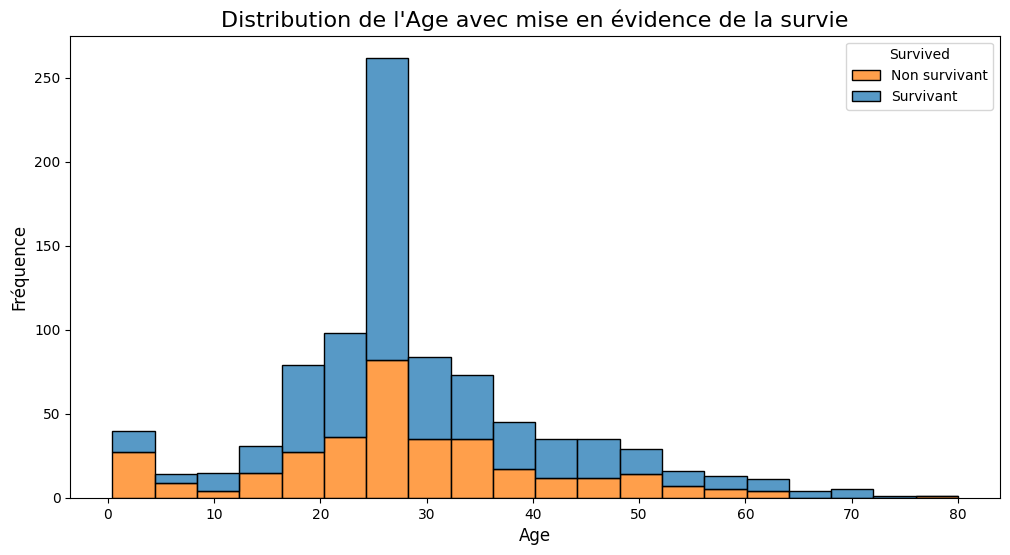

In [116]:

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Distribution de l\'Age avec mise en évidence de la survie', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.legend(title='Survived', labels=['Non survivant', 'Survivant'])
plt.savefig("./images/age_survie.png")
plt.show()

In [117]:
df['IsMinor'] = (df['Age'] < 16).astype(int)
print(df[['Age', 'IsMinor']].head())

    Age  IsMinor
0  22.0        0
1  38.0        0
2  26.0        0
3  35.0        0
4  35.0        0


In [118]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravelAlone,Cabin_known,IsMinor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0


C:\Users\Gaetan\AppData\Local\Temp\ipykernel_12036\1052668972.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survivors_by_class, x='Pclass', y='Survived', palette='viridis')


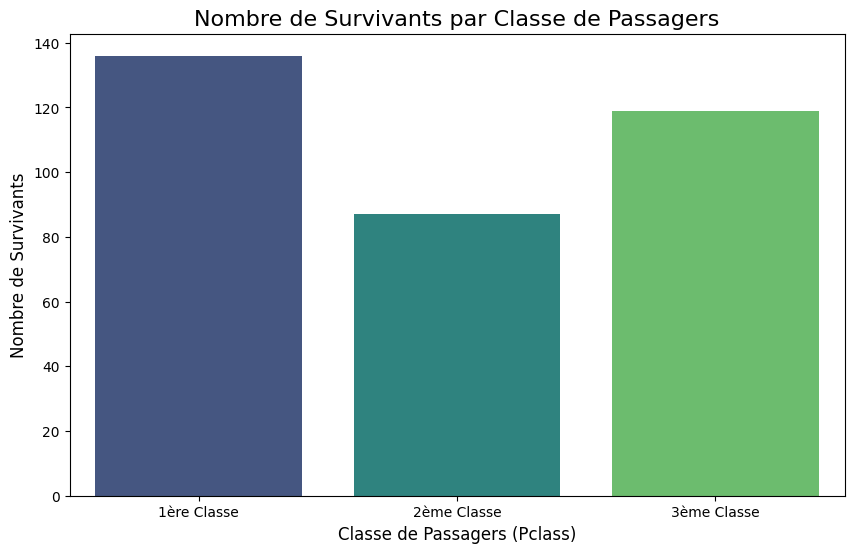

In [119]:
# Supposons que df est votre DataFrame
survivors_by_class = df.groupby('Pclass')['Survived'].sum().reset_index()

# Créer une figure
plt.figure(figsize=(10, 6))

# Bar plot de la distribution des survivants par classe
sns.barplot(data=survivors_by_class, x='Pclass', y='Survived', palette='viridis')

# Ajouter les détails du graphique
plt.title('Nombre de Survivants par Classe de Passagers', fontsize=16)
plt.xlabel('Classe de Passagers (Pclass)', fontsize=12)
plt.ylabel('Nombre de Survivants', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['1ère Classe', '2ème Classe', '3ème Classe'])

# Afficher le graphique
plt.show()
